In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
warnings.filterwarnings("ignore")

In [3]:
src = r"D:\MindCura\models\cnn\dataset\facial_emotions"

train_dir = os.path.join(src, "train")
val_dir = os.path.join(src, "val")

In [4]:
def show_image_data(directory, n_row):
  dataset = tf.keras.utils.image_dataset_from_directory(directory)
  class_names = dataset.class_names
  
  plt.figure(figsize=(n_row*5, n_row*3+2))
  
  for images, labels in dataset.take(1):
    for i in range(n_row*5):
      ax = plt.subplot(n_row, 5, i + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(class_names[labels[i]])

Found 28709 files belonging to 7 classes.


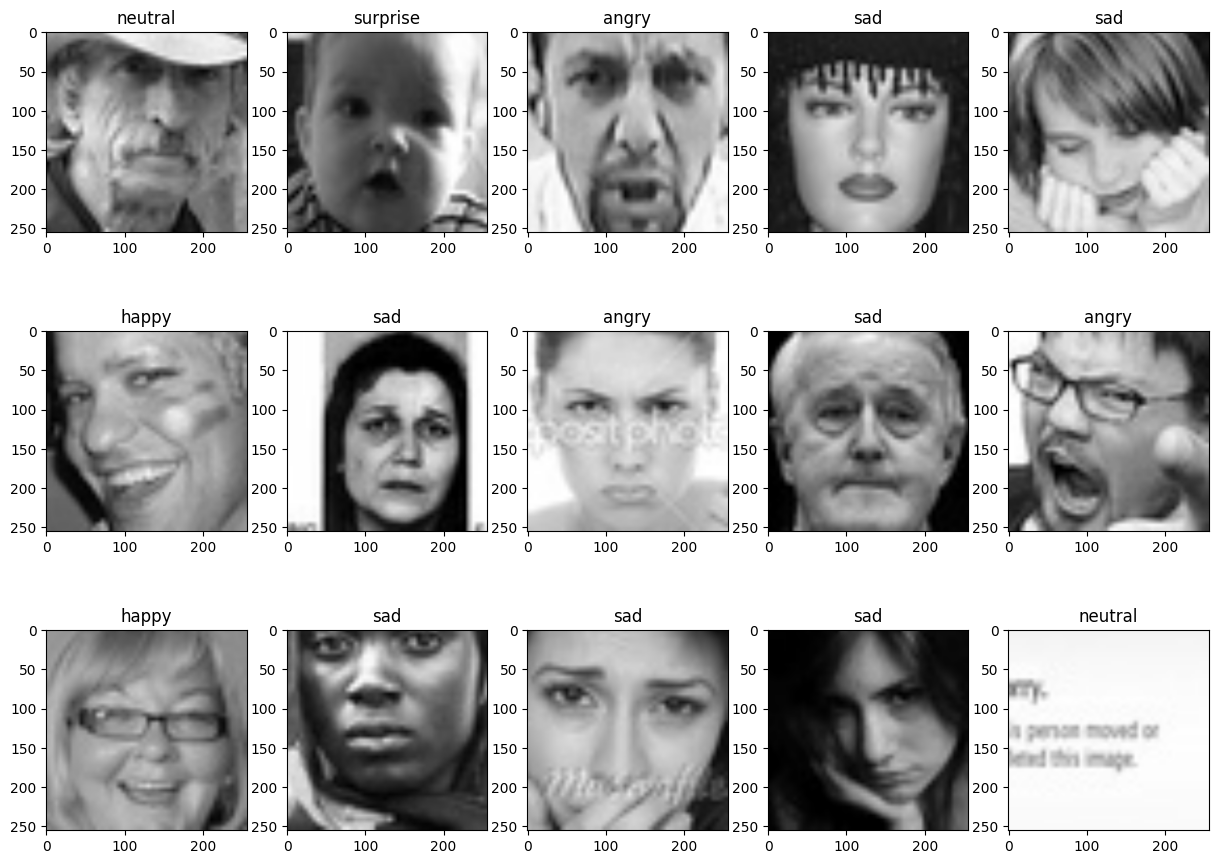

In [5]:
image = show_image_data(train_dir, 3)

In [6]:
train_data_generator = ImageDataGenerator(
    rotation_range=45,
    horizontal_flip=True,
    rescale=1/255
)

val_data_generator = ImageDataGenerator(
    rescale=1/255
)

train_datasets = train_data_generator.flow_from_directory(
    train_dir,
    target_size= (128, 128),
    class_mode='categorical'
)

val_datasets = val_data_generator.flow_from_directory(
    val_dir,
    target_size= (128, 128),
    class_mode='categorical'
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [13]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(Dropout(0.2))

# model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
# model.add(Dropout(0.2))

# model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
# model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))

optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=["accuracy"])
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [14]:
history = model.fit(train_datasets, epochs=10, validation_data=val_datasets, batch_size=32)

Epoch 1/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 534s 584ms/step - accuracy: 0.2290 - loss: 1.8417 - val_accuracy: 0.2632 - val_loss: 1.7713
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 487s 540ms/step - accuracy: 0.2648 - loss: 1.7656 - val_accuracy: 0.2986 - val_loss: 1.7260
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 486s 539ms/step - accuracy: 0.2854 - loss: 1.7365 - val_accuracy: 0.3419 - val_loss: 1.6606
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 532s 589ms/step - accuracy: 0.3237 - loss: 1.6790 - val_accuracy: 0.4079 - val_loss: 1.5440
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 552s 613ms/step - accuracy: 0.3636 - loss: 1.6144 - val_accuracy: 0.4092 - val_loss: 1.5075
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 509s 565ms/step - accuracy: 0.3851 - loss: 1.5597 - val_accuracy: 0.4517 - val_loss: 1.4337
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 1243s 1s/step - accuracy: 0.4034 - loss: 1.5313 - val_accuracy: 0.4571 - val_loss: 1.4087
Epoch 8/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 4837s 5s/step - accuracy: 0.4226 - los

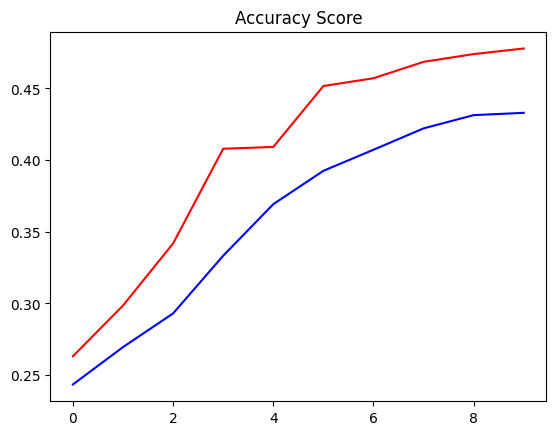

In [15]:
plt.plot(history.history["accuracy"], "b", label="accuracy")
plt.plot(history.history["val_accuracy"], "r", label="val_accuracy")
plt.title("Accuracy Score")
plt.show()

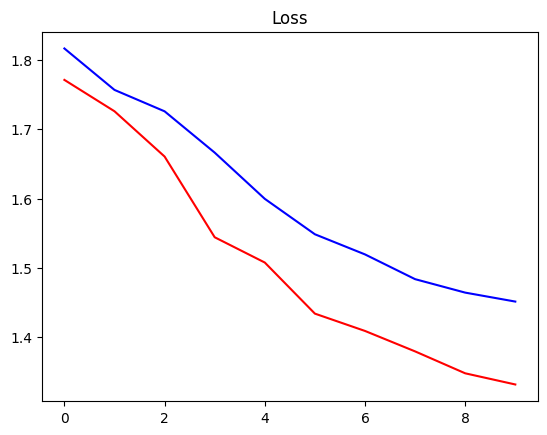

In [16]:
plt.plot(history.history["loss"], "b", label="loss")
plt.plot(history.history["val_loss"], "r", label="val_loss")
plt.title("Loss")
plt.show()